# HIRESW Tutorial
Added by Karl Schneider (July 2024)

This notebook demonstrates how to download data from the HIRESW model suite. This includes two members of the ARW as well as the FV3-hires, available at both 5km and 2.5km resolution.

In [2]:
from herbie import Herbie
from herbie.toolbox import EasyMap, pc, ccrs
from herbie import paint

import matplotlib.pyplot as plt

## Viewing the available options for this model template

In [3]:
# Defaults
H = Herbie("2024-07-24", model="hiresw", fxx=6)

✅ Found ┊ model=hiresw ┊ product=arw_2p5km ┊ 2024-Jul-24 00:00 UTC F06 ┊ GRIB2 @ nomads ┊ IDX @ nomads


In [4]:
print(H.HELP)


Herbie(date, model='hiresw', ...)

fxx : int
product : {"arw_2p5km", "fv3_2p5km", "arw_5km", ""fv3_5km}
domain : {"conus", "ak", "hi", "guam", "pr"}
member : int

2 members (1 and 2) available for ARW; Only 1 member (1) is available for FV3



In [5]:
H.PRODUCTS

{'arw_2p5km': 'CONUS 2.5km ARW',
 'fv3_2p5km': 'CONUS 2.5km FV3',
 'arw_5km': 'CONUS 5km ARW',
 'fv3_5km': 'CONUS 5km FV3'}

In [6]:
H.DOMAINS

{'conus': 'CONUS',
 'ak': 'Alaska',
 'hi': 'Hawaii',
 'guam': 'Guam',
 'pr': 'Puerto Rico'}

In [7]:
# With all available kwargs
H = Herbie("2024-07-24", model="hiresw", product="arw_5km", domain="hi", member=2, fxx=6)

✅ Found ┊ model=hiresw ┊ product=arw_5km ┊ 2024-Jul-24 00:00 UTC F06 ┊ GRIB2 @ nomads ┊ IDX @ nomads


## Example plots from each model

In [8]:
def plot_product(product, domain, member):
    H = Herbie("2024-07-24", model="hiresw", fxx=6, product=product, domain=domain, member=member)

    ds = H.xarray("TMP:2 m above")

    ax = EasyMap("50m", crs=ds.herbie.crs, figsize=[8, 8]).STATES().ax
    p = ax.pcolormesh(
        ds.longitude.values,
        ds.latitude.values,
        ds.t2m.values - 273.15,
        transform=pc,
        **paint.NWSTemperature.kwargs2,
    )
    plt.colorbar(
        p,
        ax=ax,
        orientation="horizontal",
        pad=0.05,
        **paint.NWSTemperature.cbar_kwargs2,
    )

    ax.set_title(
        f"{ds.model.upper()}: {H.product_description} ({product})\nValid: {ds.valid_time.dt.strftime('%H:%M UTC %d %b %Y').item()}",
        loc="left",
    )
    ax.set_title(ds.t2m.GRIB_name, loc="right")

✅ Found ┊ model=hiresw ┊ product=arw_5km ┊ 2024-Jul-24 00:00 UTC F06 ┊ GRIB2 @ nomads ┊ IDX @ nomads


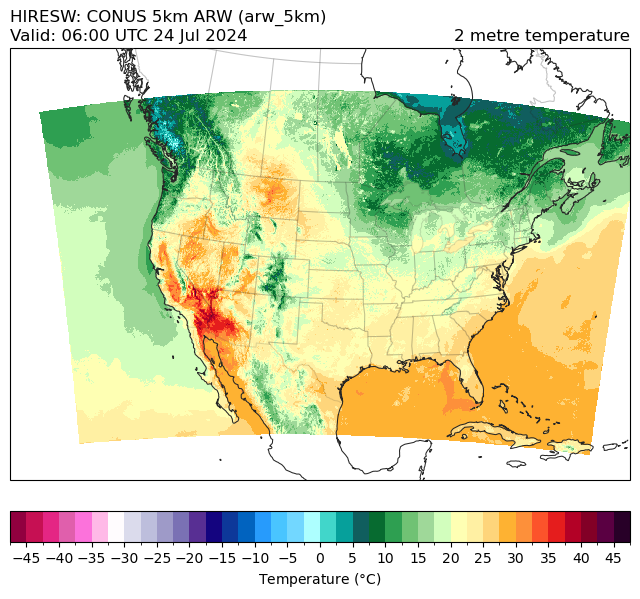

In [9]:
plot_product("arw_5km", "conus", 1)

✅ Found ┊ model=hiresw ┊ product=arw_5km ┊ 2024-Jul-24 00:00 UTC F06 ┊ GRIB2 @ nomads ┊ IDX @ nomads


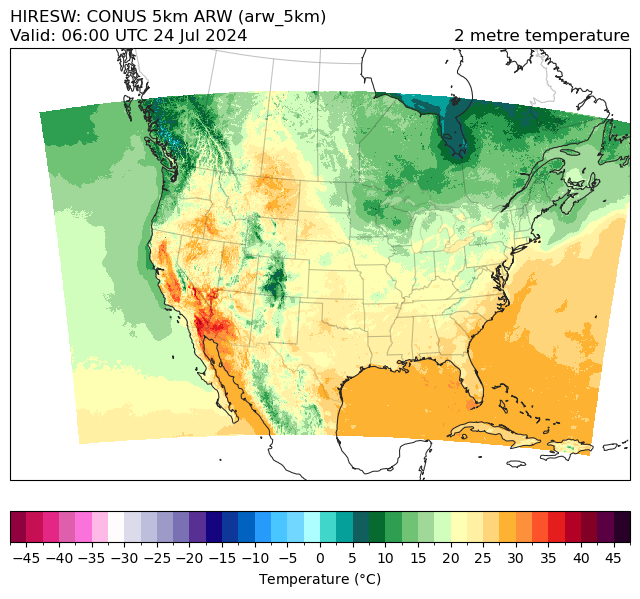

In [10]:
# Member 2
plot_product("arw_5km", "conus", 2)

✅ Found ┊ model=hiresw ┊ product=arw_5km ┊ 2024-Jul-24 00:00 UTC F06 ┊ GRIB2 @ nomads ┊ IDX @ nomads


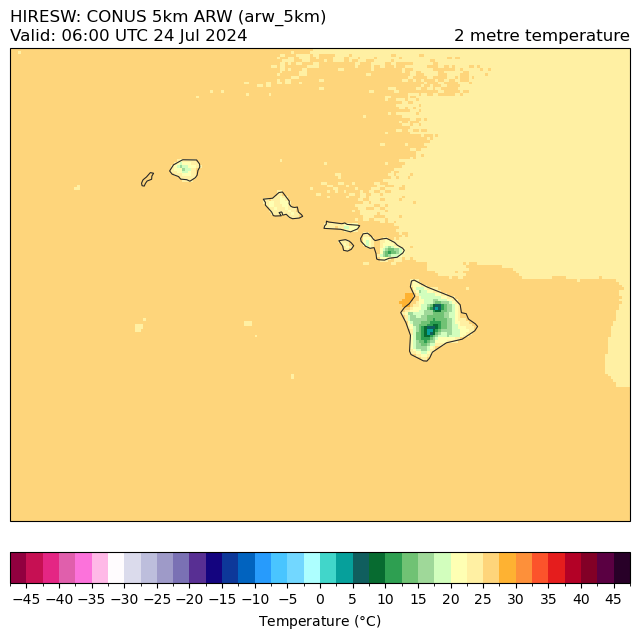

In [11]:
plot_product("arw_5km", "hi", 1)

✅ Found ┊ model=hiresw ┊ product=fv3_5km ┊ 2024-Jul-24 00:00 UTC F06 ┊ GRIB2 @ nomads ┊ IDX @ nomads


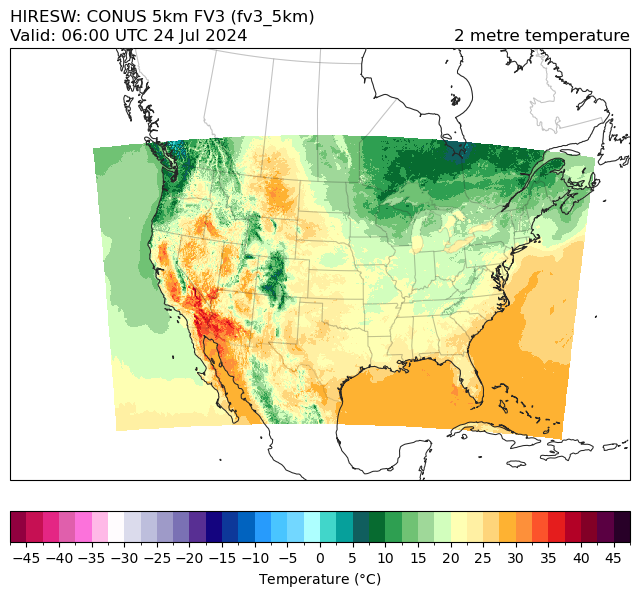

In [12]:
plot_product("fv3_5km", "conus", 1)

### 2.5 km data
I'm not sure why, but the 2km data has different lead times despite sharing the same valid time. See below:

In [13]:
H = Herbie("2024-07-24", model="hiresw", fxx=6, product="fv3_2p5km", domain="conus", member=1)

ds = H.xarray("TMP:2 m above")

✅ Found ┊ model=hiresw ┊ product=fv3_2p5km ┊ 2024-Jul-24 00:00 UTC F06 ┊ GRIB2 @ nomads ┊ IDX @ nomads


In [14]:
H.inventory("TMP:2 m")

,grib_message,start_byte,end_byte,range,reference_time,valid_time,variable,level,forecast_time,search_this
41,42,67982733,69467471.0,67982733-69467471,2024-07-24,2024-07-24 06:00:00,TMP,2 m above ground,6 hour fcst,:TMP:2 m above ground:6 hour fcst
67,68,108734761,110221188.0,108734761-110221188,2024-07-24,2024-07-24 06:00:00,TMP,2 m above ground,5 hour fcst,:TMP:2 m above ground:5 hour fcst
68,69,110221189,111718018.0,110221189-111718018,2024-07-24,2024-07-24 06:00:00,TMP,2 m above ground,4 hour fcst,:TMP:2 m above ground:4 hour fcst


It's still possible to extract something that I *believe* is correct:

In [15]:
ds = H.xarray("TMP:2 m")
ds

<xarray.Dataset> Size: 83MB
Dimensions:              (step: 3, y: 1377, x: 2145)
Coordinates:
    time                 datetime64[ns] 8B 2024-07-24
  * step                 (step) timedelta64[ns] 24B 04:00:00 05:00:00 06:00:00
    heightAboveGround    float64 8B 2.0
    latitude             (y, x) float64 24MB 20.19 20.2 20.2 ... 50.11 50.11
    longitude            (y, x) float64 24MB 238.4 238.5 238.5 ... 299.1 299.1
    valid_time           (step) datetime64[ns] 24B 2024-07-24T04:00:00 ... 20...
    gribfile_projection  object 8B None
Dimensions without coordinates: y, x
Data variables:
    t2m                  (step, y, x) float32 35MB nan nan nan ... nan nan nan
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    model:                   hiresw
    product:                 fv3_2p5km
    description:             High-Resolution Window (HIRESW) Forecast System
    remote_grib:             https://nomads.ncep.noaa.gov/pub/data/nccf/com/h...
    local_grib:              /home/meteo/kps5442/data/hiresw/20240724/subset_...
    search:                  TMP:2 m

In [16]:
def plot_map(ds, step_index):
    ds = ds.sel(step=ds.step.values[step_index])
    ax = EasyMap("50m", crs=ds.herbie.crs, figsize=[8, 8]).STATES().ax
    p = ax.pcolormesh(
        ds.longitude,
        ds.latitude,
        ds.t2m - 273.15,
        transform=pc,
        **paint.NWSTemperature.kwargs,
    )
    plt.colorbar(
        p, ax=ax, orientation="horizontal", pad=0.05, **paint.NWSTemperature.cbar_kwargs
    )
    
    ax.set_title(
        f"{ds.model.upper()}: {H.product_description} ({H.product})\nValid: {ds.valid_time.dt.strftime('%H:%M UTC %d %b %Y').item()}",
        loc="left",
    )
    ax.set_title(ds.t2m.GRIB_name, loc="right")
    plt.show()
    plt.close()

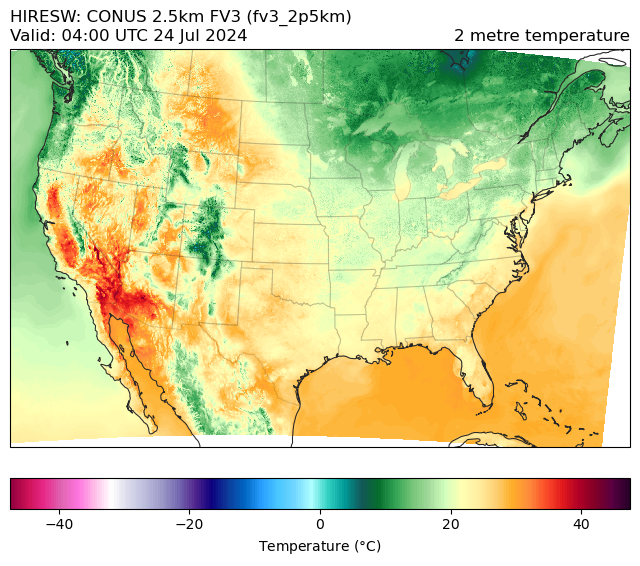

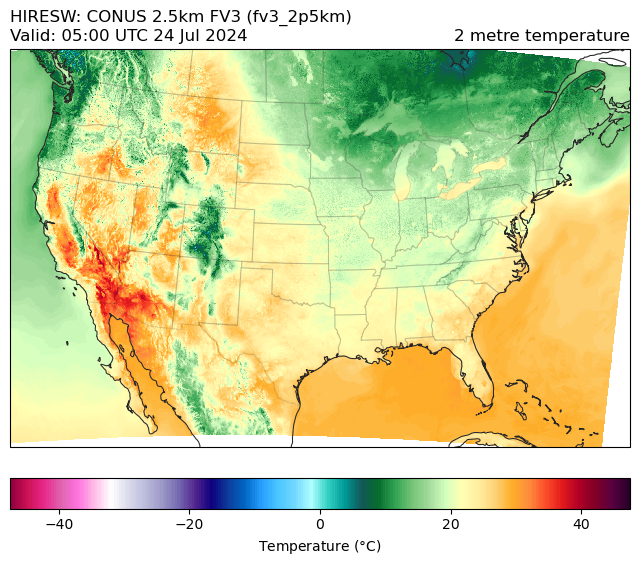

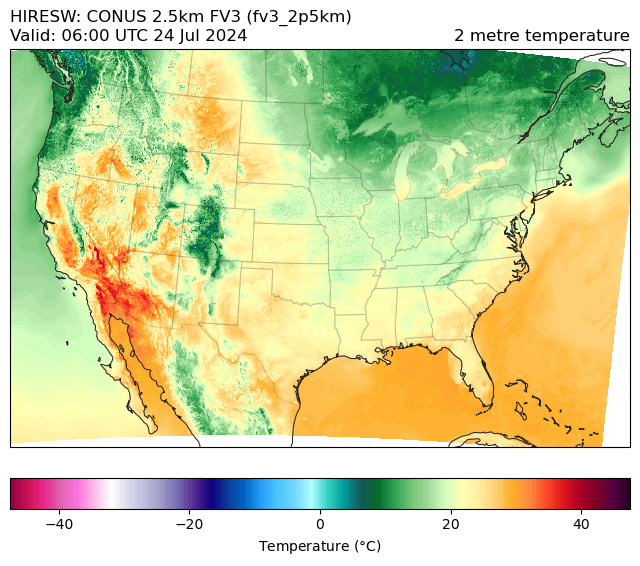

In [17]:
for idx in [0,1,2]:
    plot_map(ds, idx)

I'm not sure why there are multiple lead times, but the last one seems to be the true 6-hr forecast